In [59]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
import matplotlib.pyplot as plt
import tensorflow as tf

In [60]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [61]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [62]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [63]:
# Exponential bijector

exp = tfb.Exp()

In [64]:
# Log normal transformed distribution exp bijector

log_normal_td = exp(normal)

In [65]:
# Display event and batch shape

print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [66]:
# Base distribution

z = normal.sample(n)

#### Plots

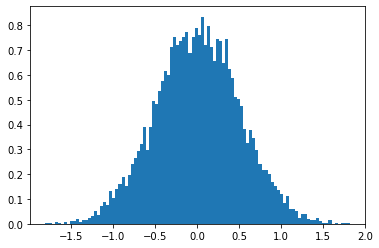

In [67]:
# Plot z density

plt.hist(z.numpy(), bins=100, density=True)
plt.show()

In [68]:
# Transformed distribution

x = log_normal_td.sample(n)

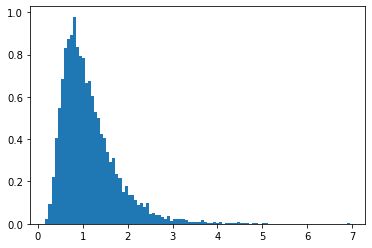

In [69]:
# plot the x density

plt.hist(x.numpy(), bins=100, density=True)
plt.show()

In [70]:
# Define log normal distribution using the one in tensorflow

log_normal = tfd.LogNormal(loc=loc, scale=scale)

In [71]:
# Sample log normal

l = log_normal.sample(n)

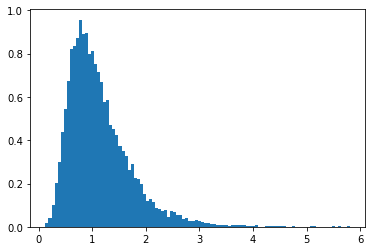

In [72]:
# plot l density

plt.hist(l.numpy(), bins=100, density=True);

We can see that the plots for l and x look the same as by transforming the base function with a exponential transformation we are in fact creating a log normal distribution.

#### Log probability

In [73]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(x)

In [74]:
# log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(x)

In [75]:
# Check log probs

tf.norm(log_prob - log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

We can see that the log prob are almost the same when comparing the distribution creating by us and the one from tensorflow probability.

### Event shape and batch shape

In [76]:
# Set a scaling lower triangular matrix

tril = tf.random.normal((2, 4, 4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)

The `LinearOperatorLowerTriangular` when applied to a given tensor returns a tensor of the same shape for which the upper triangular of the last dimension has been ignored.

In [77]:
tril

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-1.4590259 ,  0.3559779 , -0.3299697 ,  0.61346394],
        [-1.1349314 ,  0.57027626,  0.97260803,  0.24491435],
        [-0.27073836, -0.5778725 ,  1.6584498 ,  1.1707329 ],
        [-1.8743569 , -0.41969025, -0.13969333,  1.1681886 ]],

       [[-0.98815495,  0.13108665, -1.8460112 , -0.40761778],
        [-0.51241165,  0.06439486, -1.7326529 ,  0.43242115],
        [-0.61755776, -0.7435506 , -0.77576095, -0.19824466],
        [-1.5738385 , -0.19679816,  0.5907547 ,  0.55977297]]],
      dtype=float32)>

In [78]:
# View of scale_low_tri

scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-1.4590259 ,  0.        ,  0.        ,  0.        ],
        [-1.1349314 ,  0.57027626,  0.        ,  0.        ],
        [-0.27073836, -0.5778725 ,  1.6584498 ,  0.        ],
        [-1.8743569 , -0.41969025, -0.13969333,  1.1681886 ]],

       [[-0.98815495,  0.        ,  0.        ,  0.        ],
        [-0.51241165,  0.06439486,  0.        ,  0.        ],
        [-0.61755776, -0.7435506 , -0.77576095,  0.        ],
        [-1.5738385 , -0.19679816,  0.5907547 ,  0.55977297]]],
      dtype=float32)>

In [79]:
# Define scale linear operator 

scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)

The forward transformation of this bijector scales by `scale_low_tri` the tensor to which the transformation is applied.

In [123]:
normal = tfd.MultivariateNormalDiag(loc=loc, scale_diag=[[1,1,1,1], [1,1,1,1]])
normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2] event_shape=[4] dtype=float32>

In [119]:
mvn3 = tfd.MultivariateNormalTriL(loc=loc, scale_tril=scale_low_tri.to_dense())
mvn3

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[2] event_shape=[4] dtype=float32>

In [124]:
# Define scale linear operator transformed distribution with a batch and event shape

mvn = tfd.TransformedDistribution(normal, scale_lin_op)

In [125]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [126]:
# Sample

y1 = mvn.sample(sample_shape=(n,))
print(y1.shape)

(10000, 2, 4)


In [127]:
# Define a Multivariate Normal Linear Operator distribution

mvn2 = tfd.MultivariateNormalLinearOperator(loc=0, scale=scale_low_tri)

In [85]:
# Display event and batch shape

print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [86]:
# Sample

y2 = mvn2.sample(sample_shape=(n,))
print(y2.shape)

(10000, 2, 4)


In [122]:
# Check

xn = normal.sample((n, 2, 4))
tf.norm(mvn3.log_prob(xn) - mvn2.log_prob(xn)) / tf.norm(mvn3.log_prob(xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [128]:
# Check

xn = normal.sample((n, 2, 4))
tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)) / tf.norm(mvn.log_prob(xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

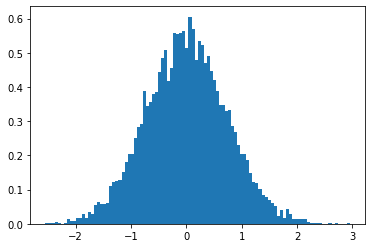

In [99]:
plt.hist(y1.numpy()[:,0,0], bins=100, density=True);

In [105]:
mvn.prob([0, 0, 0, 0])[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.2514182>